In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path

In [2]:
data_path = Path(os.getcwd()).parent.joinpath("data")
assert data_path.exists()

# Read COCO Metadata

In [3]:
coco_metadata_spacy_p = data_path.joinpath("coco_metadata_spacy.df.feather")
coco_metadata_nltk_p = data_path.joinpath("coco_metadata_nltk.df.feather")
coco_metadata_polyglot_p = data_path.joinpath("coco_metadata_polyglot.df.feather")
assert coco_metadata_spacy_p.exists()
assert coco_metadata_nltk_p.exists()
assert coco_metadata_polyglot_p.exists()

In [4]:
coco_metadata_spacy = pd.read_feather(coco_metadata_spacy_p)
print(len(coco_metadata_spacy))
coco_metadata_nltk = pd.read_feather(coco_metadata_nltk_p)
print(len(coco_metadata_nltk))
coco_metadata_polyglot = pd.read_feather(coco_metadata_polyglot_p)
print(len(coco_metadata_polyglot))

cc = {'s': coco_metadata_spacy, 'n': coco_metadata_nltk, 'p': coco_metadata_polyglot}

616767
616767
616767


# Read Flickr30K Metadata

In [12]:
f30k_metadata_spacy_p = data_path.joinpath("f30k_metadata_spacy.df.feather")
f30k_metadata_nltk_p = data_path.joinpath("f30k_metadata_nltk.df.feather")
f30k_metadata_polyglot_p = data_path.joinpath("f30k_metadata_polyglot.df.feather")
assert f30k_metadata_spacy_p.exists()
assert f30k_metadata_nltk_p.exists()
assert f30k_metadata_polyglot_p.exists()

In [13]:
f30k_metadata_spacy = pd.read_feather(f30k_metadata_spacy_p)
print(len(f30k_metadata_spacy))
f30k_metadata_nltk = pd.read_feather(f30k_metadata_nltk_p)
print(len(f30k_metadata_nltk))
f30k_metadata_polyglot = pd.read_feather(f30k_metadata_polyglot_p)
print(len(f30k_metadata_polyglot))

f3 = {'s': f30k_metadata_spacy, 'n': f30k_metadata_nltk, 'p': f30k_metadata_polyglot}

158915
158915
158915


# Read WICSMMIR (v2)

In [8]:
wicsmmir_v2_test_p = data_path.joinpath("v2/test_set_v2.df.feather")
wicsmmir_v2_train_p = data_path.joinpath("v2/train_set_v2.df.feather")
assert wicsmmir_v2_test_p.exists()
assert wicsmmir_v2_train_p.exists()
wicsmmir_v2_test = pd.read_feather(wicsmmir_v2_test_p)
wicsmmir_v2_train = pd.read_feather(wicsmmir_v2_train_p)
wicsmmir_v2 = pd.concat([wicsmmir_v2_test, wicsmmir_v2_train], verify_integrity=True, ignore_index=True)

print(f"wicsmmir_v2.columns: {wicsmmir_v2.columns}")
print(f"len(wicsmmir_v2_test): {len(wicsmmir_v2_test)}")
print(f"len(wicsmmir_v2_train): {len(wicsmmir_v2_train)}")
print(f"len(wicsmmir_v2): {len(wicsmmir_v2)}")
print(f"len(wicsmmir_v2_test) + len(wicsmmir_v2_train): {len(wicsmmir_v2_test) + len(wicsmmir_v2_train)}")

wicsmmir_v2.columns: Index(['index', 'wikicaps_id', 'caption'], dtype='object')
len(wicsmmir_v2_test): 9380
len(wicsmmir_v2_train): 386494
len(wicsmmir_v2): 395874
len(wicsmmir_v2_test) + len(wicsmmir_v2_train): 395874


In [16]:
wicsmmir_v2_metadata_spacy_p = data_path.joinpath("wicsmmir_v2_metadata_spacy.df.feather") 
wicsmmir_v2_metadata_nltk_p = data_path.joinpath("wicsmmir_v2_metadata_nltk.df.feather")
wicsmmir_v2_metadata_polyglot_p = data_path.joinpath("wicsmmir_v2_metadata_polyglot.df.feather")
wc = {}
wc['s'] = pd.read_feather(wicsmmir_v2_metadata_spacy_p)
print(len(wc['s']))
wc['n'] = pd.read_feather(wicsmmir_v2_metadata_nltk_p)
print(len(wc['n']))
wc['p'] = pd.read_feather(wicsmmir_v2_metadata_polyglot_p)
print(len(wc['p']))

395874
395874
395874


# Generate metadata for WICSMMIR V2 WITH SPACY

In [11]:
import sys
sys.path.append('..')
from utils import generate_caption_stats

wc = {}

In [12]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='spacy'

wc['s'] = generate_caption_stats(wicsmmir_v2, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['s'].to_feather(wicsmmir_v2_metadata_spacy_p)

2021-03-19 18:24:39.181 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using SPACY...
100%|██████████| 395874/395874 [14:13<00:00, 464.06it/s]
2021-03-19 18:38:54.124 | INFO     | utils:generate_caption_stats:521 - Finished adding caption statistics in 854.9423661231995 seconds!


# Generate metadata for WICSMMIR V2 WITH NLTK

In [13]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='nltk'

wc['n'] = generate_caption_stats(wicsmmir_v2, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['n'].to_feather(wicsmmir_v2_metadata_nltk_p)

2021-03-19 18:38:56.002 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using NLTK...
  0%|          | 0/395874 [00:00<?, ?it/s][nltk_data] Downloading package punkt to /home/p0w3r/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/p0w3r/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package universal_treebanks_v20 to
[nltk_data]     /home/p0w3r/nltk_data...
[nltk_data]   Package universal_treebanks_v20 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/p0w3r/nltk_data

# Generate metadata for WICSMMIR V2 WITH POLYGLOT

In [14]:
pos_tags_stats = True
readability_scores = False
n_spacy_workers = 8
backend='polyglot'

wc['p'] = generate_caption_stats(wicsmmir_v2, pos_tags_stats, readability_scores, n_spacy_workers, backend=backend)
wc['p'].to_feather(wicsmmir_v2_metadata_polyglot_p)

2021-03-19 20:19:04.516 | INFO     | utils:generate_caption_stats:146 - Generating caption statistics using POLYGLOT...
  0%|          | 0/395874 [00:00<?, ?it/s]

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package embeddings2.en is already up-to-date!
[polyglot_data] Downloading package ner2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package ner2.en is already up-to-date!
[polyglot_data] Downloading package pos2.en to
[polyglot_data]     /home/p0w3r/polyglot_data...
[polyglot_data]   Package pos2.en is already up-to-date!


  0%|          | 67/395874 [00:09<5:16:58, 20.81it/s] Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 155/395874 [00:10<1:21:50, 80.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 233/395874 [00:11<53:24, 123.47it/s]  Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 462/395874 [00:12<48:24, 136.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 476/395874 [00:12<48:15, 136.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  0%|          | 720/395874 [00:14<51:06, 128.84it/s]Detector is not able to detect

  1%|          | 2189/395874 [00:25<50:39, 129.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2284/395874 [00:26<47:09, 139.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2298/395874 [00:26<48:25, 135.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2342/395874 [00:26<46:55, 139.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2419/395874 [00:27<44:22, 147.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2582/395874 [00:28<47:45, 137.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 2778/395874

  1%|          | 4543/395874 [00:43<51:38, 126.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 4651/395874 [00:44<47:55, 136.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 4739/395874 [00:45<54:06, 120.49it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 4769/395874 [00:45<49:31, 131.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  1%|          | 4815/395874 [00:45<50:05, 130.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

  2%|▏         | 6586/395874 [00:59<46:41, 138.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 6710/395874 [01:00<48:34, 133.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 6888/395874 [01:01<49:23, 131.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 7051/395874 [01:02<52:40, 123.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 7219/395874 [01:04<50:26, 128.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  2%|▏         | 7262/395874 [01:04<50:37, 127.94it/s]Detector is not able to detect the language reliably.
Detector is not able to dete

  3%|▎         | 10852/395874 [01:32<50:29, 127.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 10917/395874 [01:32<46:52, 136.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 11018/395874 [01:33<52:33, 122.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 11104/395874 [01:34<49:44, 128.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 11149/395874 [01:34<51:08, 125.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 11526/395874 [01:37<51:11, 125.14it/s]Detector is not able to detect the language reliably.
Detector is not able t

  3%|▎         | 13184/395874 [01:50<43:53, 145.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 13242/395874 [01:50<48:29, 131.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 13345/395874 [01:51<48:26, 131.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 13478/395874 [01:52<46:57, 135.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 13626/395874 [01:53<45:12, 140.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  3%|▎         | 13641/395874 [01:53<47:07, 135.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  4%|▎         | 13864

  5%|▍         | 18030/395874 [02:27<46:20, 135.87it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 18116/395874 [02:28<46:51, 134.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 18227/395874 [02:29<47:42, 131.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 18360/395874 [02:30<48:20, 130.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 18498/395874 [02:31<51:40, 121.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 19105/395874 [02:36<49:29, 126.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  5%|▍         | 19133

  6%|▌         | 22626/395874 [03:03<49:22, 126.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 22778/395874 [03:04<47:06, 132.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 22879/395874 [03:05<54:53, 113.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 23029/395874 [03:06<52:43, 117.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 23174/395874 [03:07<46:29, 133.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 23222/395874 [03:07<42:58, 144.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▌         | 23238

Detector is not able to detect the language reliably.
  6%|▌         | 24741/395874 [03:20<46:43, 132.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▋         | 25042/395874 [03:22<54:56, 112.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▋         | 25072/395874 [03:23<49:17, 125.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▋         | 25089/395874 [03:23<46:04, 134.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▋         | 25207/395874 [03:24<45:53, 134.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  6%|▋         | 25221/395874 [03:24<47:07, 131.11it/s]Detector is not able to detect the language reliably.
Detector is not able t

  7%|▋         | 29053/395874 [03:53<44:02, 138.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29122/395874 [03:53<49:46, 122.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29189/395874 [03:54<54:52, 111.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29445/395874 [03:56<44:51, 136.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29504/395874 [03:56<50:37, 120.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29553/395874 [03:57<43:38, 139.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  7%|▋         | 29659

  8%|▊         | 33084/395874 [04:24<42:05, 143.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  8%|▊         | 33270/395874 [04:25<47:42, 126.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  8%|▊         | 33585/395874 [04:28<48:48, 123.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▊         | 33682/395874 [04:28<42:18, 142.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▊         | 33900/395874 [04:30<50:47, 118.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
  9%|▊         | 33961/395874 [04:31<45:18, 133.14it/s]Detector is not able to detect the language reliably.
Detector is not able t

 10%|▉         | 38138/395874 [05:02<43:56, 135.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 38307/395874 [05:03<47:32, 125.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 38364/395874 [05:04<44:37, 133.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 38424/395874 [05:04<44:05, 135.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 38811/395874 [05:07<46:07, 129.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|▉         | 39138/395874 [05:10<47:31, 125.12it/s]Detector is not able to detect the language reliably.
Detector is not able t

 10%|█         | 40497/395874 [05:20<47:22, 125.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|█         | 40524/395874 [05:20<46:42, 126.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|█         | 40596/395874 [05:21<48:11, 122.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|█         | 40671/395874 [05:22<43:27, 136.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|█         | 40858/395874 [05:23<45:18, 130.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 10%|█         | 40958/

 11%|█         | 42742/395874 [05:37<44:11, 133.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 42862/395874 [05:38<45:48, 128.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 43022/395874 [05:39<45:18, 129.78it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 43332/395874 [05:41<40:33, 144.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 43389/395874 [05:42<45:09, 130.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 11%|█         | 43751/395874 [05:45<45:28, 129.07it/s]Detector is not able to detect the language reliably.
Detector is not able t

 12%|█▏        | 47278/395874 [06:12<48:08, 120.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 47292/395874 [06:12<46:18, 125.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 47306/395874 [06:12<45:14, 128.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 47356/395874 [06:13<50:47, 114.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 47485/395874 [06:14<41:47, 138.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 12%|█▏        | 47499/395874 [06:14<43:30, 133.43it/s]Detector is not able to detect the language reliably.
Detector is not able t

Detector is not able to detect the language reliably.
 13%|█▎        | 49547/395874 [06:30<46:49, 123.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 49590/395874 [06:30<46:01, 125.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 50048/395874 [06:33<36:23, 158.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 50099/395874 [06:34<36:54, 156.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 50275/395874 [06:35<40:33, 142.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 13%|█▎        | 50552/395874 [06:37<44:34, 129.14it/s]Detector is not able t

 14%|█▎        | 53584/395874 [07:00<46:29, 122.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▎        | 53702/395874 [07:01<42:17, 134.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▎        | 53836/395874 [07:02<48:41, 117.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▎        | 53851/395874 [07:02<46:12, 123.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▎        | 53911/395874 [07:02<43:32, 130.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▎        | 54159/395874 [07:04<42:33, 133.81it/s]Detector is not able to detect the language reliably.
Detector is not able t

 14%|█▍        | 55545/395874 [07:15<43:37, 130.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 55677/395874 [07:16<42:27, 133.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 55705/395874 [07:16<42:41, 132.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 55767/395874 [07:17<40:57, 138.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 55854/395874 [07:18<43:30, 130.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 14%|█▍        | 56007/

Detector is not able to detect the language reliably.
 15%|█▌        | 59816/395874 [07:49<45:05, 124.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▌        | 59875/395874 [07:49<41:07, 136.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▌        | 59954/395874 [07:50<40:32, 138.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▌        | 60045/395874 [07:50<41:50, 133.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▌        | 60092/395874 [07:51<39:09, 142.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 15%|█▌        | 60716/395874 [07:56<45:33, 122.61it/s]Detector is not able t

 16%|█▌        | 62299/395874 [08:08<41:26, 134.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▌        | 62406/395874 [08:09<38:06, 145.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▌        | 63015/395874 [08:14<43:43, 126.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▌        | 63064/395874 [08:14<39:08, 141.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▌        | 63203/395874 [08:15<40:54, 135.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▌        | 63217/395874 [08:15<42:08, 131.54it/s]Detector is not able to detect the language reliably.
Detector is not able t

 16%|█▋        | 64359/395874 [08:24<42:42, 129.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 64550/395874 [08:26<41:53, 131.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 64775/395874 [08:27<43:33, 126.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 64865/395874 [08:28<39:57, 138.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 64971/395874 [08:29<40:07, 137.45it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 65017/395874 [08:29<41:05, 134.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 16%|█▋        | 65059

 17%|█▋        | 68639/395874 [08:57<39:04, 139.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 68750/395874 [08:58<40:13, 135.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 68841/395874 [08:59<46:51, 116.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 17%|█▋        | 69101/395874 [09:00<38:21, 141.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 69343/395874 [09:02<42:58, 126.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 69460/395874 [09:03<37:59, 143.20it/s]Detector is not able to detect the language reliably.
Detector is not able t

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72615/395874 [09:28<46:19, 116.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72687/395874 [09:28<40:44, 132.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72881/395874 [09:30<41:34, 129.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72897/395874 [09:30<39:07, 137.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72914/395874 [09:30<36:54, 145.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 18%|█▊        | 72944/

 19%|█▉        | 74853/395874 [09:45<42:12, 126.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▉        | 74922/395874 [09:45<44:34, 120.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▉        | 75001/395874 [09:46<40:38, 131.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▉        | 75105/395874 [09:47<43:50, 121.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▉        | 75122/395874 [09:47<39:44, 134.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 19%|█▉        | 75179/395874 [09:47<40:53, 130.73it/s]Detector is not able to detect the language reliably.
Detector is not able t

 20%|█▉        | 78851/395874 [10:15<43:56, 120.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 79300/395874 [10:19<36:29, 144.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 79334/395874 [10:19<35:25, 148.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 79397/395874 [10:19<38:14, 137.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 79503/395874 [10:20<37:33, 140.36it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 20%|██        | 79730/395874 [10:22<39:21, 133.90it/s]Detector is not able to detect the language reliably.
Detector is not able t

 20%|██        | 81058/395874 [10:32<38:58, 134.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 81265/395874 [10:33<41:39, 125.87it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 81324/395874 [10:34<42:37, 122.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 81404/395874 [10:34<38:28, 136.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 81462/395874 [10:35<38:10, 137.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██        | 81494/395874 [10:35<36:00, 145.55it/s]Detector is not able to detect the language reliably.
Detector is not able t

 21%|██▏       | 84841/395874 [11:00<38:53, 133.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██▏       | 84883/395874 [11:01<40:27, 128.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 21%|██▏       | 84984/395874 [11:02<47:42, 108.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 85245/395874 [11:04<35:33, 145.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 85265/395874 [11:04<32:42, 158.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 85281/395874 [11:04<34:21, 150.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 22%|██▏       | 85482

 23%|██▎       | 89127/395874 [11:33<38:58, 131.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 89273/395874 [11:34<38:51, 131.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 89434/395874 [11:35<38:37, 132.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 89636/395874 [11:37<37:15, 136.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 89664/395874 [11:37<41:19, 123.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 23%|██▎       | 89723/

 24%|██▎       | 93282/395874 [12:05<38:09, 132.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▎       | 93393/395874 [12:06<42:04, 119.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▎       | 93489/395874 [12:07<45:58, 109.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▎       | 93730/395874 [12:09<38:56, 129.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▎       | 93909/395874 [12:10<40:29, 124.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 94381/395874 [12:14<35:41, 140.77it/s]Detector is not able t

Detector is not able to detect the language reliably.
 24%|██▍       | 95578/395874 [12:23<37:56, 131.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 95632/395874 [12:23<40:11, 124.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 95710/395874 [12:24<34:02, 146.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 95774/395874 [12:24<33:39, 148.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 96002/395874 [12:26<33:38, 148.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 24%|██▍       | 96017/395874 [12:26<34:44, 143.88it/s]Detector is not able t

 25%|██▌       | 99808/395874 [12:55<41:54, 117.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 99864/395874 [12:55<39:07, 126.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 100052/395874 [12:57<37:16, 132.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 100130/395874 [12:57<35:16, 139.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 100220/395874 [12:58<34:31, 142.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 25%|██▌       | 100571/395874 [13:01<36:53, 133.40it/s]Detector is not able to detect the language reliably.
Detector is not ab

 26%|██▌       | 103766/395874 [13:26<35:09, 138.47it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▌       | 103838/395874 [13:26<35:03, 138.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▋       | 104036/395874 [13:28<37:07, 131.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▋       | 104063/395874 [13:28<38:11, 127.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▋       | 104278/395874 [13:30<36:53, 131.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▋       | 104447/395874 [13:31<39:08, 124.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 26%|██▋       |

 27%|██▋       | 108110/395874 [13:59<36:46, 130.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 108258/395874 [14:00<37:49, 126.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 108286/395874 [14:01<36:53, 129.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 27%|██▋       | 108820/395874 [14:05<35:42, 134.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 108886/395874 [14:05<34:20, 139.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 108917/395874 [14:05<35:09, 136.03it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 28%|██▊       | 110470/395874 [14:17<36:46, 129.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 110641/395874 [14:19<33:29, 141.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 111117/395874 [14:22<37:04, 128.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 111203/395874 [14:23<39:34, 119.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 111258/395874 [14:23<39:49, 119.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 28%|██▊       | 111799/395874 [14:27<38:37, 122.58it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 29%|██▉       | 114476/395874 [14:48<36:58, 126.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 114515/395874 [14:48<40:29, 115.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 115003/395874 [14:52<32:40, 143.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 115192/395874 [14:53<34:18, 136.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 115407/395874 [14:55<36:06, 129.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 115540/395874 [14:56<37:38, 124.11it/s]Detector is not able to detect the language reliably.
Detector is not 

 29%|██▉       | 116713/395874 [15:05<33:21, 139.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 29%|██▉       | 116728/395874 [15:05<32:43, 142.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 117247/395874 [15:09<39:31, 117.49it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 117496/395874 [15:11<35:46, 129.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 117626/395874 [15:12<35:49, 129.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       | 117749/395874 [15:13<38:20, 120.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|██▉       |

 30%|███       | 118974/395874 [15:22<40:22, 114.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|███       | 119121/395874 [15:23<32:33, 141.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|███       | 119183/395874 [15:24<34:22, 134.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|███       | 119200/395874 [15:24<32:02, 143.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|███       | 119215/395874 [15:24<32:32, 141.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 30%|███       | 119291/395874 [15:25<32:53, 140.15it/s]Detector is not able to detect the language reliably.
Detector is not 

 31%|███       | 121142/395874 [15:39<37:20, 122.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       | 121209/395874 [15:39<29:42, 154.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       | 121474/395874 [15:42<38:41, 118.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       | 121575/395874 [15:42<32:00, 142.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       | 121646/395874 [15:43<37:52, 120.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       | 121977/395874 [15:46<39:56, 114.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 31%|███       |

 32%|███▏      | 125273/395874 [16:11<37:00, 121.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 125360/395874 [16:12<33:34, 134.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 125426/395874 [16:12<39:59, 112.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 125444/395874 [16:12<35:15, 127.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 125477/395874 [16:13<34:43, 129.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      | 125541/395874 [16:13<30:53, 145.87it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 32%|███▏      |

 33%|███▎      | 129575/395874 [16:45<33:00, 134.47it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 129889/395874 [16:47<35:19, 125.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 130134/395874 [16:49<32:55, 134.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 130195/395874 [16:50<31:57, 138.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 130376/395874 [16:51<33:59, 130.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 130523/395874 [16:52<33:23, 132.47it/s]Detector is not 

 33%|███▎      | 131919/395874 [17:02<35:09, 125.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 131990/395874 [17:03<34:28, 127.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 132074/395874 [17:04<33:41, 130.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 132104/395874 [17:04<34:04, 129.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 132239/395874 [17:05<35:24, 124.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 33%|███▎      | 132382/395874 [17:06<33:47, 129.96it/s]Detector is not 

 34%|███▍      | 134288/395874 [17:21<35:41, 122.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 134328/395874 [17:21<34:46, 125.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 134673/395874 [17:24<32:21, 134.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 134715/395874 [17:24<38:55, 111.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 134989/395874 [17:26<36:03, 120.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 34%|███▍      | 135410/395874 [17:30<34:26, 126.06it/s]Detector is not 

 35%|███▍      | 136653/395874 [17:39<35:52, 120.44it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 35%|███▍      | 136744/395874 [17:40<31:59, 134.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 35%|███▍      | 136772/395874 [17:40<33:02, 130.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 35%|███▍      | 136803/395874 [17:41<30:56, 139.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 35%|███▍      | 136863/395874 [17:41<33:23, 129.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 35%|███▍      | 136894/395874 [17:41<31:24, 137.41it/s]Detector is not 

 36%|███▌      | 140680/395874 [18:10<27:29, 154.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 140827/395874 [18:11<32:59, 128.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 140963/395874 [18:12<29:09, 145.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 141445/395874 [18:16<32:53, 128.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 141587/395874 [18:17<34:30, 122.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 141956/395874 [18:20<32:02, 132.06it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 142834/395874 [18:27<31:17, 134.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 143328/395874 [18:31<33:56, 124.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 143422/395874 [18:32<32:34, 129.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▌      | 143463/395874 [18:32<32:57, 127.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▋      | 143670/395874 [18:33<32:17, 130.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 36%|███▋      | 143686/395874 [18:34<31:19, 134.17it/s]Detector is not 

 37%|███▋      | 145164/395874 [18:45<33:27, 124.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 145193/395874 [18:45<32:25, 128.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 145207/395874 [18:45<32:33, 128.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 145453/395874 [18:47<30:47, 135.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 145522/395874 [18:48<32:08, 129.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 37%|███▋      | 145537/395874 [18:48<31:16, 133.39it/s]Detector is not able to detect the language reliably.
Detector is not 

 38%|███▊      | 149445/395874 [19:18<30:19, 135.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 149517/395874 [19:19<30:50, 133.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 149611/395874 [19:20<32:51, 124.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 149644/395874 [19:20<29:41, 138.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 149685/395874 [19:20<34:45, 118.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      | 149728/395874 [19:21<30:10, 135.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 38%|███▊      |

 39%|███▉      | 153608/395874 [19:50<32:09, 125.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 154097/395874 [19:54<28:56, 139.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 154111/395874 [19:54<31:08, 129.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 154145/395874 [19:54<27:52, 144.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 154231/395874 [19:55<29:08, 138.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 154374/395874 [19:56<31:57, 125.93it/s]Detector is not 

Detector is not able to detect the language reliably.
 39%|███▉      | 155931/395874 [20:09<30:49, 129.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 39%|███▉      | 156109/395874 [20:10<28:07, 142.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 156470/395874 [20:13<31:17, 127.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 156808/395874 [20:15<29:28, 135.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 156862/395874 [20:16<32:56, 120.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|███▉      | 156877/395874 [20:16<31:18, 127.20it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 158759/395874 [20:30<31:02, 127.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 159203/395874 [20:34<30:40, 128.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 159358/395874 [20:35<33:20, 118.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 159647/395874 [20:37<29:38, 132.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 159959/395874 [20:40<31:02, 126.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 40%|████      | 1

 41%|████      | 162926/395874 [21:02<28:42, 135.22it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████      | 163223/395874 [21:04<27:08, 142.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████▏     | 163299/395874 [21:05<28:26, 136.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████▏     | 163313/395874 [21:05<28:15, 137.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████▏     | 163386/395874 [21:05<30:38, 126.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████▏     | 163414/395874 [21:06<31:02, 124.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 41%|████▏     |

 42%|████▏     | 165013/395874 [21:18<29:00, 132.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 165089/395874 [21:19<27:20, 140.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 165104/395874 [21:19<27:31, 139.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 165189/395874 [21:19<31:35, 121.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 165289/395874 [21:20<29:50, 128.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 165318/395874 [21:20<28:47, 133.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     |

Detector is not able to detect the language reliably.
 42%|████▏     | 167295/395874 [21:35<29:58, 127.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 167350/395874 [21:36<29:33, 128.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 167422/395874 [21:36<29:31, 128.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 167435/395874 [21:38<1:53:34, 33.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 167472/395874 [21:38<1:06:29, 57.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 42%|████▏     | 167511/395874 [21:38<41:56, 90.74it/s]  Detector is not able to detect the language reliably.
Detector is n

 43%|████▎     | 171434/395874 [22:08<28:48, 129.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 171509/395874 [22:09<29:31, 126.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 171633/395874 [22:10<30:16, 123.45it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 43%|████▎     | 172205/395874 [22:14<26:30, 140.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▎     | 172374/395874 [22:16<28:29, 130.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▎     | 172449/395874 [22:16<27:30, 135.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▎     |

 44%|████▍     | 175715/395874 [22:41<29:11, 125.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 175991/395874 [22:43<25:32, 143.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 176064/395874 [22:44<27:20, 134.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 176078/395874 [22:44<28:15, 129.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 176093/395874 [22:44<27:59, 130.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 44%|████▍     | 176154/395874 [22:45<29:05, 125.87it/s]Detector is not 

 45%|████▌     | 179163/395874 [23:08<25:23, 142.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 179249/395874 [23:09<29:48, 121.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 179302/395874 [23:09<31:42, 113.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 179628/395874 [23:12<24:43, 145.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 179806/395874 [23:13<31:33, 114.10it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 45%|████▌     | 1

 46%|████▋     | 183257/395874 [23:40<27:07, 130.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▋     | 183272/395874 [23:40<26:28, 133.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▋     | 183286/395874 [23:40<26:18, 134.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▋     | 183376/395874 [23:41<26:24, 134.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▋     | 183620/395874 [23:43<24:58, 141.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 46%|████▋     | 183663/395874 [23:43<27:20, 129.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not 

 47%|████▋     | 186925/395874 [24:08<26:45, 130.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 47%|████▋     | 186941/395874 [24:08<25:12, 138.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 47%|████▋     | 187142/395874 [24:10<28:30, 122.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 47%|████▋     | 187339/395874 [24:11<29:11, 119.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 47%|████▋     | 187920/395874 [24:16<29:43, 116.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 188505/395874 [24:20<24:51, 139.01it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 48%|████▊     | 189334/395874 [24:26<26:21, 130.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 189692/395874 [24:29<25:27, 135.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 189720/395874 [24:29<26:52, 127.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 189815/395874 [24:30<26:52, 127.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 189861/395874 [24:30<25:30, 134.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 48%|████▊     | 1

 49%|████▉     | 193474/395874 [24:58<23:20, 144.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 193535/395874 [24:58<24:21, 138.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 193967/395874 [25:02<27:44, 121.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 194025/395874 [25:02<25:31, 131.78it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 194257/395874 [25:04<27:05, 124.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 194326/395874 [25:04<27:15, 123.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     |

 49%|████▉     | 195701/395874 [25:15<25:43, 129.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 49%|████▉     | 195944/395874 [25:17<24:45, 134.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|████▉     | 196164/395874 [25:19<24:00, 138.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|████▉     | 196404/395874 [25:20<26:12, 126.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|████▉     | 196468/395874 [25:21<22:24, 148.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|████▉     | 196583/395874 [25:22<26:27, 125.51it/s]Detector is not 

 50%|█████     | 198241/395874 [25:35<25:23, 129.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|█████     | 198305/395874 [25:35<22:07, 148.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|█████     | 198399/395874 [25:36<25:57, 126.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|█████     | 198552/395874 [25:37<26:07, 125.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|█████     | 198680/395874 [25:38<25:10, 130.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 50%|█████     | 198860/395874 [25:39<27:40, 118.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not 

 51%|█████     | 202724/395874 [26:09<25:26, 126.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████     | 202801/395874 [26:09<25:28, 126.28it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████▏    | 202894/395874 [26:10<22:17, 144.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████▏    | 202924/395874 [26:10<23:49, 135.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████▏    | 203086/395874 [26:11<22:48, 140.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 51%|█████▏    | 203216/395874 [26:12<27:47, 115.54it/s]Detector is not 

 52%|█████▏    | 204628/395874 [26:23<21:51, 145.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 204700/395874 [26:24<23:48, 133.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 204743/395874 [26:24<23:57, 132.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 205084/395874 [26:27<24:34, 129.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 205102/395874 [26:27<22:15, 142.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 205149/395874 [26:27<22:26, 141.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    |

 52%|█████▏    | 207143/395874 [26:43<22:54, 137.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 207256/395874 [26:43<22:34, 139.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 207315/395874 [26:44<24:57, 125.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 207410/395874 [26:45<25:25, 123.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 207461/395874 [26:45<21:38, 145.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 52%|█████▏    | 2

 53%|█████▎    | 209277/395874 [27:00<21:56, 141.76it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 209335/395874 [27:01<25:03, 124.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 209658/395874 [27:03<23:15, 133.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 209701/395874 [27:03<24:01, 129.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 209886/395874 [27:05<25:23, 122.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 53%|█████▎    | 210015/395874 [27:06<22:42, 136.39it/s]Detector is not 

 53%|█████▎    | 211708/395874 [27:19<23:47, 128.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 211999/395874 [27:21<23:47, 128.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 212276/395874 [27:23<25:12, 121.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 212526/395874 [27:25<22:18, 136.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 212585/395874 [27:26<22:44, 134.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▎    | 212748/395874 [27:27<23:41, 128.79it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 54%|█████▍    | 214227/395874 [27:38<23:53, 126.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 214310/395874 [27:39<23:44, 127.44it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 214328/395874 [27:39<21:50, 138.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 214385/395874 [27:39<23:05, 131.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 214636/395874 [27:41<21:40, 139.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 54%|█████▍    | 214828/395874 [27:43<22:54, 131.71it/s]Detector is not able to detect the language reliably.
Detector is not 

 55%|█████▍    | 216136/395874 [27:53<22:43, 131.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 216235/395874 [27:54<24:50, 120.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 216400/395874 [27:55<20:18, 147.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 216563/395874 [27:56<22:17, 134.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 216883/395874 [27:59<22:11, 134.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 55%|█████▍    | 217261/395874 [28:02<23:33, 126.34it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 56%|█████▌    | 220750/395874 [28:29<25:55, 112.60it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 220940/395874 [28:30<21:52, 133.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 221026/395874 [28:31<22:56, 127.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 221053/395874 [28:31<23:14, 125.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 221173/395874 [28:32<20:24, 142.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▌    | 221231/395874 [28:33<22:30, 129.29it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 56%|█████▋    | 223142/395874 [28:47<23:05, 124.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▋    | 223247/395874 [28:48<21:19, 134.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▋    | 223493/395874 [28:50<19:56, 144.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 56%|█████▋    | 223508/395874 [28:50<20:42, 138.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 223936/395874 [28:53<23:42, 120.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 224305/395874 [28:56<21:33, 132.62it/s]Detector is not 

 57%|█████▋    | 225559/395874 [29:06<22:19, 127.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 225685/395874 [29:07<25:02, 113.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 225700/395874 [29:07<23:03, 123.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 225772/395874 [29:08<23:19, 121.53it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 225973/395874 [29:09<20:59, 134.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 57%|█████▋    | 226045/395874 [29:10<22:43, 124.59it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 58%|█████▊    | 227692/395874 [29:22<23:27, 119.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 227763/395874 [29:23<23:04, 121.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 227889/395874 [29:24<21:01, 133.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 227945/395874 [29:24<20:56, 133.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 228402/395874 [29:28<20:10, 138.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 228476/395874 [29:28<23:18, 119.68it/s]Detector is not able to detect the language reliably.
Detector is not 

 58%|█████▊    | 229822/395874 [29:39<19:55, 138.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 229932/395874 [29:40<21:05, 131.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 230051/395874 [29:41<20:15, 136.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 230081/395874 [29:41<19:44, 139.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 230142/395874 [29:41<19:36, 140.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 58%|█████▊    | 230157/395874 [29:41<20:26, 135.14it/s]Detector is not able to detect the language reliably.
Detector is not 

 59%|█████▊    | 231880/395874 [29:54<19:33, 139.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 231912/395874 [29:55<18:29, 147.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 231942/395874 [29:55<19:01, 143.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 231987/395874 [29:55<19:47, 137.96it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 232225/395874 [29:57<21:32, 126.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▊    | 232255/395874 [29:57<19:59, 136.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 59%|█████▉    |

 60%|█████▉    | 236364/395874 [30:29<18:12, 146.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 236436/395874 [30:30<21:31, 123.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 236477/395874 [30:30<21:30, 123.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 236519/395874 [30:30<21:16, 124.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 236549/395874 [30:30<19:39, 135.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|█████▉    | 236605/395874 [30:31<21:33, 123.12it/s]Detector is not 

 60%|██████    | 238778/395874 [30:48<21:37, 121.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 238860/395874 [30:48<17:34, 148.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 238935/395874 [30:49<19:55, 131.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 238949/395874 [30:49<20:34, 127.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 238994/395874 [30:49<20:15, 129.02it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 60%|██████    | 239120/395874 [30:50<21:22, 122.22it/s]Detector is not able to detect the language reliably.
Detector is not 

 61%|██████    | 240882/395874 [31:04<18:48, 137.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 240896/395874 [31:04<19:29, 132.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 241029/395874 [31:05<19:36, 131.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 241693/395874 [31:10<19:36, 131.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 241859/395874 [31:11<19:35, 131.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 61%|██████    | 241876/395874 [31:11<18:50, 136.26it/s]Detector is not 

 62%|██████▏   | 245265/395874 [31:37<17:45, 141.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 245282/395874 [31:37<16:53, 148.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 245441/395874 [31:39<22:28, 111.54it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 245515/395874 [31:39<18:03, 138.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 245615/395874 [31:40<19:06, 131.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   | 245734/395874 [31:41<20:18, 123.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 62%|██████▏   |

Detector is not able to detect the language reliably.
 62%|██████▏   | 247416/395874 [31:54<18:37, 132.87it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 247675/395874 [31:56<17:15, 143.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 248037/395874 [31:58<22:52, 107.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 248074/395874 [31:59<21:31, 114.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 248152/395874 [31:59<21:27, 114.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 63%|██████▎   | 248250/395874 [32:00<19:47, 124.33it/s]Detector is not 

 64%|██████▎   | 251607/395874 [32:27<16:55, 142.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▎   | 251739/395874 [32:28<18:04, 132.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▎   | 252004/395874 [32:30<17:15, 138.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▎   | 252018/395874 [32:30<17:25, 137.65it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▎   | 252061/395874 [32:30<17:49, 134.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 64%|██████▎   | 252121/395874 [32:30<17:09, 139.60it/s]Detector is not able to detect the language reliably.
Detector is not 

 65%|██████▍   | 255736/395874 [32:58<18:52, 123.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 255762/395874 [32:59<19:24, 120.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 255819/395874 [32:59<17:54, 130.29it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 256014/395874 [33:01<19:08, 121.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 256029/395874 [33:01<18:38, 125.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   | 256372/395874 [33:03<21:26, 108.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 65%|██████▍   |

 66%|██████▌   | 259523/395874 [33:28<17:03, 133.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   | 259625/395874 [33:29<17:03, 133.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   | 259639/395874 [33:29<16:59, 133.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   | 259705/395874 [33:29<15:45, 143.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   | 259917/395874 [33:31<16:43, 135.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   | 259972/395874 [33:31<17:48, 127.17it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▌   |

Detector is not able to detect the language reliably.
 66%|██████▋   | 262272/395874 [33:49<17:30, 127.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▋   | 262423/395874 [33:50<16:24, 135.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▋   | 262494/395874 [33:50<17:20, 128.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▋   | 262670/395874 [33:52<16:12, 136.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▋   | 262799/395874 [33:53<17:57, 123.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 66%|██████▋   | 262902/395874 [33:53<16:09, 137.11it/s]Detector is not 

 67%|██████▋   | 266338/395874 [34:20<14:56, 144.45it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 266779/395874 [34:24<19:36, 109.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 266840/395874 [34:24<16:33, 129.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 67%|██████▋   | 267056/395874 [34:26<16:03, 133.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 267311/395874 [34:28<16:48, 127.49it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 267922/395874 [34:32<16:13, 131.44it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   |

 68%|██████▊   | 268941/395874 [34:40<14:26, 146.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 269109/395874 [34:41<17:59, 117.47it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 269133/395874 [34:42<19:06, 110.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 269482/395874 [34:44<17:05, 123.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 269598/395874 [34:45<15:40, 134.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 269612/395874 [34:45<15:52, 132.60it/s]Detector is not able to detect the language reliably.
Detector is not 

 68%|██████▊   | 270851/395874 [34:55<13:55, 149.71it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 270899/395874 [34:55<14:48, 140.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 68%|██████▊   | 271118/395874 [34:57<16:48, 123.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 271293/395874 [34:58<15:00, 138.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 271342/395874 [34:59<16:47, 123.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▊   | 271372/395874 [34:59<15:52, 130.66it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not 

 69%|██████▉   | 272915/395874 [35:11<15:01, 136.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 272962/395874 [35:11<14:39, 139.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 273097/395874 [35:12<16:19, 125.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 273112/395874 [35:12<15:59, 127.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 273480/395874 [35:15<16:50, 121.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 69%|██████▉   | 273638/395874 [35:17<15:53, 128.26it/s]Detector is not able to detect the language reliably.
Detector is not 

 70%|███████   | 277459/395874 [35:46<14:38, 134.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 277508/395874 [35:46<14:26, 136.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 277573/395874 [35:47<14:36, 134.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 277631/395874 [35:47<15:12, 129.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 277661/395874 [35:47<14:36, 134.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 70%|███████   | 277789/395874 [35:48<15:04, 130.62it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not 

 71%|███████   | 281710/395874 [36:18<13:52, 137.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████   | 281785/395874 [36:18<14:57, 127.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████   | 281812/395874 [36:19<15:06, 125.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████   | 281928/395874 [36:20<14:51, 127.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████▏  | 282110/395874 [36:21<13:53, 136.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 71%|███████▏  | 282152/395874 [36:21<14:38, 129.49it/s]Detector is not 

 72%|███████▏  | 283808/395874 [36:34<14:36, 127.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 283901/395874 [36:35<13:38, 136.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 284020/395874 [36:36<14:44, 126.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 284090/395874 [36:36<15:16, 121.95it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 284118/395874 [36:36<14:18, 130.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 72%|███████▏  | 2

 73%|███████▎  | 288101/395874 [37:07<12:35, 142.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 288326/395874 [37:09<13:10, 136.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 288496/395874 [37:10<15:07, 118.27it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 288511/395874 [37:10<14:24, 124.19it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 288568/395874 [37:11<14:12, 125.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 73%|███████▎  | 288644/395874 [37:11<13:14, 135.02it/s]Detector is not able to detect the language reliably.
Detector is not 

 74%|███████▍  | 292489/395874 [37:41<13:30, 127.61it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 74%|███████▍  | 292736/395874 [37:43<13:04, 131.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 74%|███████▍  | 292843/395874 [37:43<12:54, 133.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 74%|███████▍  | 292872/395874 [37:44<12:38, 135.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 74%|███████▍  | 292886/395874 [37:44<13:23, 128.20it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 74%|███████▍  | 292948/395874 [37:44<13:12, 129.83it/s]Detector is not able to detect the language reliably.
Detector is not 

 75%|███████▍  | 296855/395874 [38:15<17:25, 94.74it/s] Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 296978/395874 [38:16<12:40, 130.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 297006/395874 [38:16<12:35, 130.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 297135/395874 [38:17<12:42, 129.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 297424/395874 [38:19<11:32, 142.25it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 75%|███████▌  | 297468/395874 [38:20<11:56, 137.32it/s]Detector is not able to detect the language reliably.
Detector is not 

 75%|███████▌  | 298752/395874 [38:30<12:19, 131.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 298946/395874 [38:31<10:40, 151.34it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 299111/395874 [38:32<12:43, 126.75it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 299169/395874 [38:33<12:22, 130.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 299300/395874 [38:34<14:08, 113.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 299529/395874 [38:35<13:35, 118.15it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  |

 76%|███████▌  | 301314/395874 [38:49<11:00, 143.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▌  | 301627/395874 [38:52<12:34, 124.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▋  | 301869/395874 [38:54<13:16, 117.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▋  | 301882/395874 [38:54<13:07, 119.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▋  | 302587/395874 [38:59<11:53, 130.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 76%|███████▋  | 302759/395874 [39:00<12:26, 124.70it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  |

 77%|███████▋  | 303435/395874 [39:06<12:17, 125.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 303524/395874 [39:06<11:40, 131.87it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 303582/395874 [39:07<11:03, 139.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 303632/395874 [39:07<10:02, 153.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 303690/395874 [39:07<12:09, 126.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 303823/395874 [39:08<11:39, 131.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  |

 77%|███████▋  | 305138/395874 [39:19<10:38, 142.18it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 305168/395874 [39:19<11:17, 133.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 305331/395874 [39:20<11:23, 132.56it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 305573/395874 [39:22<12:18, 122.23it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 305774/395874 [39:24<11:24, 131.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  | 305819/395874 [39:24<10:39, 140.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 77%|███████▋  |

 78%|███████▊  | 309736/395874 [39:54<11:20, 126.63it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 309769/395874 [39:54<10:10, 141.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 309799/395874 [39:54<10:24, 137.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 310161/395874 [39:57<11:25, 125.04it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 310350/395874 [39:59<10:50, 131.51it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 78%|███████▊  | 310381/395874 [39:59<10:26, 136.52it/s]Detector is not able to detect the language reliably.
Detector is not 

 79%|███████▉  | 314079/395874 [40:27<10:22, 131.48it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 79%|███████▉  | 314522/395874 [40:30<10:28, 129.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 79%|███████▉  | 314665/395874 [40:32<11:21, 119.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 314892/395874 [40:33<10:54, 123.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 315161/395874 [40:35<09:49, 136.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  | 315459/395874 [40:38<11:17, 118.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 80%|███████▉  |

 81%|████████  | 318721/395874 [41:03<09:06, 141.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 318788/395874 [41:03<09:43, 132.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 318884/395874 [41:04<10:25, 123.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 318902/395874 [41:04<09:20, 137.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 319676/395874 [41:10<09:13, 137.68it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  | 319925/395874 [41:12<08:28, 149.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 81%|████████  |

 82%|████████▏ | 323898/395874 [41:42<09:13, 130.14it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ | 324112/395874 [41:44<08:48, 135.73it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ | 324153/395874 [41:44<09:35, 124.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ | 324195/395874 [41:45<09:23, 127.16it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ | 324374/395874 [41:46<10:10, 117.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ | 324444/395874 [41:47<08:45, 135.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 82%|████████▏ |

 83%|████████▎ | 327846/395874 [42:13<08:35, 131.98it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 328024/395874 [42:14<08:32, 132.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 328101/395874 [42:15<08:26, 133.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 328339/395874 [42:17<08:18, 135.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 328460/395874 [42:18<09:23, 119.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 328501/395874 [42:18<09:02, 124.25it/s]Detector is not 

 83%|████████▎ | 329843/395874 [42:28<07:36, 144.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 330000/395874 [42:29<08:33, 128.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 330107/395874 [42:30<08:29, 129.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 330335/395874 [42:32<08:13, 132.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 83%|████████▎ | 330460/395874 [42:33<08:26, 129.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 84%|████████▎ | 330650/395874 [42:34<08:34, 126.72it/s]Detector is not able to detect the language reliably.
Detector is not 

 84%|████████▍ | 332258/395874 [42:46<07:49, 135.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 84%|████████▍ | 332509/395874 [42:48<07:59, 132.24it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 84%|████████▍ | 332888/395874 [42:51<07:24, 141.80it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 84%|████████▍ | 332903/395874 [42:51<07:29, 140.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 84%|████████▍ | 333024/395874 [42:52<07:21, 142.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not ab

 85%|████████▌ | 336675/395874 [43:20<07:59, 123.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 336692/395874 [43:20<07:14, 136.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 336753/395874 [43:20<07:07, 138.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 337093/395874 [43:23<07:01, 139.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 337107/395874 [43:23<07:18, 133.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 85%|████████▌ | 337339/395874 [43:25<07:11, 135.74it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 86%|████████▌ | 338642/395874 [43:35<07:34, 125.86it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 338726/395874 [43:35<07:18, 130.29it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 339002/395874 [43:38<07:08, 132.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 339043/395874 [43:38<07:46, 121.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 339088/395874 [43:38<07:31, 125.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 86%|████████▌ | 339164/395874 [43:39<06:55, 136.52it/s]Detector is not able to detect the language reliably.
Detector is not 

 87%|████████▋ | 342576/395874 [44:05<06:20, 140.08it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 343061/395874 [44:09<06:03, 145.35it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 343135/395874 [44:11<22:35, 38.91it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 343201/395874 [44:11<09:41, 90.58it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 87%|████████▋ | 343333/395874 [44:12<07:31, 116.46it/s]Detector is not able to detect the language reliably.
Detector is not able

 88%|████████▊ | 346564/395874 [44:38<06:31, 125.90it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ | 346752/395874 [44:39<06:26, 127.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ | 346840/395874 [44:40<06:12, 131.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ | 346872/395874 [44:40<05:39, 144.43it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ | 346887/395874 [44:40<05:49, 140.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ | 346969/395874 [44:41<06:31, 124.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 88%|████████▊ |

 89%|████████▊ | 350956/395874 [45:12<05:47, 129.32it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▊ | 351023/395874 [45:12<05:57, 125.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▊ | 351040/395874 [45:12<05:28, 136.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▊ | 351069/395874 [45:13<05:39, 131.82it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▊ | 351126/395874 [45:13<06:06, 122.11it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▊ | 351310/395874 [45:15<05:48, 127.99it/s]Detector is not able to detect the language reliably.
Detector is not 

Detector is not able to detect the language reliably.
 89%|████████▉ | 353334/395874 [45:31<05:35, 126.83it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 353359/395874 [45:31<06:02, 117.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 353417/395874 [45:31<05:34, 126.88it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 353732/395874 [45:34<05:22, 130.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 353846/395874 [45:35<06:20, 110.42it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 89%|████████▉ | 354045/395874 [45:36<05:33, 125.43it/s]Detector is not able to detect the language reliably.
Detector is not 

 90%|█████████ | 357848/395874 [46:05<04:46, 132.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 357876/395874 [46:05<04:57, 127.92it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 357892/395874 [46:06<04:46, 132.55it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 357951/395874 [46:06<04:59, 126.69it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 90%|█████████ | 358113/395874 [46:07<04:59, 126.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████ | 358318/395874 [46:09<04:53, 127.83it/s]Detector is not 

 91%|█████████▏| 361797/395874 [46:36<03:50, 148.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████▏| 361814/395874 [46:36<03:47, 149.97it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████▏| 361890/395874 [46:37<04:17, 132.06it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████▏| 361918/395874 [46:37<04:28, 126.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████▏| 362132/395874 [46:39<04:06, 136.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 91%|█████████▏| 362209/395874 [46:39<04:14, 132.04it/s]Detector is not 

 92%|█████████▏| 365934/395874 [47:08<04:12, 118.74it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 92%|█████████▏| 366040/395874 [47:08<03:23, 146.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 366457/395874 [47:12<03:59, 122.67it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 366570/395874 [47:13<03:51, 126.78it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 366638/395874 [47:13<04:01, 121.13it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎| 366752/395874 [47:14<03:25, 141.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 93%|█████████▎|

 94%|█████████▎| 370585/395874 [47:43<03:27, 121.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▎| 370684/395874 [47:43<03:05, 135.99it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▎| 370715/395874 [47:44<03:16, 128.09it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▎| 370883/395874 [47:45<03:05, 135.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▎| 371010/395874 [47:46<02:59, 138.40it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▍| 371167/395874 [47:47<03:26, 119.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 94%|█████████▍|

 95%|█████████▌| 376227/395874 [48:26<02:42, 120.89it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 376328/395874 [48:27<02:20, 139.07it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 376487/395874 [48:28<02:18, 139.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 376852/395874 [48:31<02:15, 140.30it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 377514/395874 [48:36<02:16, 134.72it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 95%|█████████▌| 377556/395874 [48:36<02:22, 128.21it/s]Detector is not able to detect the language reliably.
Detector is not 

 96%|█████████▌| 378367/395874 [48:43<02:13, 131.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 378469/395874 [48:43<02:09, 133.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 378568/395874 [48:44<02:10, 132.33it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 378600/395874 [48:44<01:59, 144.50it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 378629/395874 [48:44<02:10, 132.00it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 378909/395874 [48:47<02:08, 131.65it/s]Detector is not able to detect the language reliably.
Detector is not 

 96%|█████████▌| 380382/395874 [48:58<01:47, 143.52it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 380455/395874 [48:59<01:57, 131.03it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 380482/395874 [48:59<02:15, 114.01it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 380538/395874 [48:59<02:04, 122.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 380684/395874 [49:01<02:15, 112.39it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌| 380826/395874 [49:02<01:54, 131.41it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 96%|█████████▌|

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 384843/395874 [49:32<01:23, 132.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 385107/395874 [49:34<01:21, 131.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 385123/395874 [49:35<01:18, 136.26it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 385151/395874 [49:35<01:21, 132.12it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 97%|█████████▋| 385178/395874 [49:35<01:34, 113.42it/s]Detector is not able to detect the language reliably.
Detector is not ab

 98%|█████████▊| 387095/395874 [49:50<01:06, 132.05it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 387203/395874 [49:51<01:01, 140.64it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 387408/395874 [49:52<01:06, 127.59it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 387434/395874 [49:53<01:11, 118.84it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 387492/395874 [49:53<01:02, 134.46it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 387634/395874 [49:54<01:10, 116.71it/s]Detector is not able to detect the language reliably.
Detector is not 

 98%|█████████▊| 388981/395874 [50:04<00:50, 137.77it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 389198/395874 [50:06<00:49, 134.21it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 389406/395874 [50:08<00:53, 121.38it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 389489/395874 [50:08<00:50, 125.37it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 389649/395874 [50:09<00:46, 133.93it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 98%|█████████▊| 389696/395874 [50:10<00:47, 130.10it/s]Detector is not able to detect the language reliably.
Detector is not 

 99%|█████████▉| 393286/395874 [50:38<00:20, 127.57it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 393299/395874 [50:38<00:20, 124.79it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 393365/395874 [50:38<00:20, 122.94it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 393410/395874 [50:39<00:18, 133.31it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 393424/395874 [50:39<00:19, 128.45it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
 99%|█████████▉| 393480/395874 [50:41<00:55, 43.43it/s] Detector is not 

100%|█████████▉| 395446/395874 [50:56<00:03, 127.81it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
100%|█████████▉| 395650/395874 [50:57<00:01, 122.85it/s]Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
100%|██████████| 395874/395874 [51:25<00:00, 128.28it/s]


# Common metadata structure

| ColumnId			| Description																| Datatype	|
|-------------------|---------------------------------------------------------------------------|-----------|
| caption			| Caption of the Image														| str		|
| num_tok			| Number of Tokens in the caption											| int		|
| num_sent			| Number of Sentences in the caption										| int		|
| min_sent_len		| Minimum number of Tokens in the Sentences of the caption					| int		|
| max_sent_len		| Maximum number of Tokens in the Sentences of the caption					| int		|
| num_ne			| Number of Named Entities in the caption									| int		|
| num_nouns			| Number of Tokens with NOUN POS Tag **										| int		|
| num_propn			| Number of Tokens with PROPN POS Tag **									| int		|
| num_conj			| Number of Tokens with CONJ POS Tag **										| int		|
| num_verb			| Number of Tokens with VERB POS Tag **										| int		|
| num_sym			| Number of Tokens with SYM POS Tag **										| int		|
| num_num			| Number of Tokens with NUM POS Tag **										| int		|
| num_adp			| Number of Tokens with ADP POS Tag **										| int		|
| num_adj			| Number of Tokens with ADJ POS Tag **										| int		|
| ratio_ne_tok		| Ratio of tokens associated with Named Entities vs all Tokens **			| int		|
| ratio_noun_tok	| Ratio of tokens tagged as NOUN vs all Tokens **							| int		|
| ratio_propn_tok	| Ratio of tokens tagged as PROPN vs all Tokens **							| int		|
| ratio_all_noun_tok| Ratio of tokens tagged as PROPN or NOUN vs all Tokens **					| int		|

# Compare
- min
- max
- median
- mean

of all columns except 'caption', 'ne_types', 'ne_texts'

In [17]:
relevant_cols = ['num_tok',
                 'num_sent',
                 'min_sent_len',
                 'max_sent_len',
                 'num_ne',
                 'num_nouns',
                 'num_propn',
                 'num_conj',
                 'num_verb',
                 'num_sym',
                 'num_num',
                 'num_adp',
                 'num_adj',
                 'ratio_ne_tok',
                 'ratio_noun_tok',
                 'ratio_propn_tok',
                 'ratio_all_noun_tok',
                 ]

min_coco_s = cc['s'][relevant_cols].min()
min_coco_n = cc['n'][relevant_cols].min()
min_coco_p = cc['p'][relevant_cols].min()

max_coco_s = cc['s'][relevant_cols].max()
max_coco_n = cc['n'][relevant_cols].max()
max_coco_p = cc['p'][relevant_cols].max()

mean_coco_s = cc['s'][relevant_cols].mean()
mean_coco_n = cc['n'][relevant_cols].mean()
mean_coco_p = cc['p'][relevant_cols].mean()

median_coco_s = cc['s'][relevant_cols].median()
median_coco_n = cc['n'][relevant_cols].median()
median_coco_p = cc['p'][relevant_cols].median()



min_f30k_s = f3['s'][relevant_cols].min()
min_f30k_n = f3['n'][relevant_cols].min()
min_f30k_p = f3['p'][relevant_cols].min()

max_f30k_s = f3['s'][relevant_cols].max()
max_f30k_n = f3['n'][relevant_cols].max()
max_f30k_p = f3['p'][relevant_cols].max()

mean_f30k_s = f3['s'][relevant_cols].mean()
mean_f30k_n = f3['n'][relevant_cols].mean()
mean_f30k_p = f3['p'][relevant_cols].mean()

median_f30k_s = f3['s'][relevant_cols].median()
median_f30k_n = f3['n'][relevant_cols].median()
median_f30k_p = f3['p'][relevant_cols].median()



min_wc_s = wc['s'][relevant_cols].min()
min_wc_n = wc['n'][relevant_cols].min()
min_wc_p = wc['p'][relevant_cols].min()

max_wc_s = wc['s'][relevant_cols].max()
max_wc_n = wc['n'][relevant_cols].max()
max_wc_p = wc['p'][relevant_cols].max()

mean_wc_s = wc['s'][relevant_cols].mean()
mean_wc_n = wc['n'][relevant_cols].mean()
mean_wc_p = wc['p'][relevant_cols].mean()

median_wc_s = wc['s'][relevant_cols].median()
median_wc_n = wc['n'][relevant_cols].median()
median_wc_p = wc['p'][relevant_cols].median()

In [18]:
compare_df = pd.DataFrame([min_coco_s, min_coco_n, min_coco_p,
                           min_f30k_s, min_f30k_n, min_f30k_p,
                           min_wc_s, min_wc_n, min_wc_p,
                           max_coco_s, max_coco_n, max_coco_p,
                           max_f30k_s, max_f30k_n, max_f30k_p,
                           max_wc_s, max_wc_n, max_wc_p,
                           mean_coco_s, mean_coco_n, mean_coco_p,
                           mean_f30k_s, mean_f30k_n, mean_f30k_p,
                           mean_wc_s, mean_wc_n, mean_wc_p,
                           median_coco_s, median_coco_n, median_coco_p,
                           median_f30k_s, median_f30k_n, median_f30k_p,
                           median_wc_s, median_wc_n, median_wc_p],
                          index=['min_coco_spacy', 'min_coco_nltk', 'min_coco_polyglot',
                                 'min_f30k_spacy', 'min_f30k_nltk', 'min_f30k_polyglot',
                                 'min_wc_spacy', 'min_wc_nltk', 'min_wc_polyglot',
                                 'max_coco_spacy', 'max_coco_nltk', 'max_coco_polyglot',
                                 'max_f30k_spacy', 'max_f30k_nltk', 'max_f30k_polyglot',
                                 'max_wc_spacy', 'max_wc_nltk', 'max_wc_polyglot',
                                 'mean_coco_spacy', 'mean_coco_nltk', 'mean_coco_polyglot',
                                 'mean_f30k_spacy', 'mean_f30k_nltk', 'mean_f30k_polyglot',
                                 'mean_wc_spacy', 'mean_wc_nltk', 'mean_wc_polyglot',
                                 'median_coco_spacy', 'median_coco_nltk', 'median_coco_polyglot',
                                 'median_f30k_spacy', 'median_f30k_nltk', 'median_f30k_polyglot',
                                 'median_wc_spacy', 'median_wc_nltk', 'median_wc_polyglot',                                 
                                ])
compare_df.head(24)

,num_tok,num_sent,min_sent_len,max_sent_len,num_ne,num_nouns,num_propn,num_conj,num_verb,num_sym,num_num,num_adp,num_adj,ratio_ne_tok,ratio_noun_tok,ratio_propn_tok,ratio_all_noun_tok
min_coco_spacy,7.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_coco_nltk,6.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_coco_polyglot,6.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_f30k_spacy,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_f30k_nltk,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_f30k_polyglot,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_wc_spacy,12.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_wc_nltk,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min_wc_polyglot,9.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max_coco_spacy,60.000000,6.000000,60.000000,60.000000,8.000000,24.000000,17.000000,0.000000,8.000000,2.000000,8.000000,14.000000,10.000000,1.000000,0.857143,1.000000,1.000000


In [19]:
compare_df.reset_index().to_feather(data_path.joinpath('coco_vs_f30k_vs_wicsmmir_v2_metadata.df.feather'))

# Plot Stuff

# Box Plots

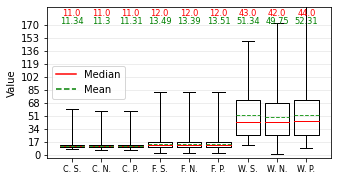

In [20]:
from matplotlib.lines import Line2D

def create_boxplot(cc, wc, f3, column, figsize=None, title=None, ylim=None, path=None):
    fig, ax = plt.subplots(figsize=figsize)
    fig.subplots_adjust(left=0.075, right=0.95, top=0.95, bottom=0.25)
    
    data = [cc['s'][column], cc['n'][column], cc['p'][column],
            f3['s'][column], f3['n'][column], f3['p'][column],
            wc['s'][column], wc['n'][column], wc['p'][column]
           ]

    num_boxes = len(data)
    labels = ['COCO Spacy', 'COCO NLTK', 'COCO polyglot',
              'Flickr30k Spacy', 'Flickr30k NLTK', 'Flickr30k polyglot',
              'WICSMMIR SpaCy', 'WICSMMIR NLTK', 'WICSMMIR polyglot']
    labels = ['C. S.', 'C. N.', 'C. P.',
              'F. S.', 'F. N.', 'F. P.',
              'W. S.', 'W. N.', 'W. P.']
    pos = .3 * np.arange(num_boxes)+1
    
    bp = ax.boxplot(data, 
                    vert=True, 
                    whis=[0, 100],
                    showfliers=False,
                    meanline=True,
                    showmeans=True,
                    widths=.25, 
                    positions=pos)
    
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['medians'], color='red')
    
    # Add median + mean label
    medians = [cc[x][column].median() for x in list('snp')]
    medians += [f3[x][column].median() for x in list('snp')]
    medians += [wc[x][column].median() for x in list('snp')]
    medians = [str(np.round(s, 2)) for s in medians]
    
    means = [cc[x][column].mean() for x in list('snp')]
    means += [f3[x][column].mean() for x in list('snp')]
    means += [wc[x][column].mean() for x in list('snp')]
    means = [str(np.round(s, 2)) for s in means]
    
    for tick, label in zip(range(num_boxes), ax.get_xticklabels()):
        # median label
        ax.text(pos[tick], .94, medians[tick],
                           transform=ax.get_xaxis_transform(),
                           horizontalalignment='center', size='small', color='red')
        # mean label
        ax.text(pos[tick], .89, means[tick],
                         transform=ax.get_xaxis_transform(),
                         horizontalalignment='center', size='small', color='green')

    # add legend
    fake_legend_elements = [Line2D([0], [0], color='red', label='Median'), 
                            Line2D([0], [0], ls='--', color='green', label='Mean')]
    ax.legend(handles=fake_legend_elements, loc='center left')
    
    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)


    # Hide these grid behind plot objects
    ax.set_axisbelow(True)
    if title is None:
        title = f'Comparison of column {column} with WICSMMIR and COCO'
    ax.set_title(title)
    ax.set_ylabel('Value')


    #Set the axes ranges and axes labels
    ax.set_xticklabels(labels, rotation=0, fontsize=8)
    ax.set_xticks(pos)
    ax.set_xlim(pos.min() - .25, pos.max() + .25)
    
    if ylim is None:
        maxx = max([cc[x][column].max() for x in list('snp')] + [wc[x][column].max() for x in list('snp')])
        minn = min([cc[x][column].min() for x in list('snp')] + [wc[x][column].min() for x in list('snp')])
    else:
        maxx = ylim[1]
        minn = ylim[0]
    ytick = (maxx-minn) * .1
    ax.set_yticks(np.arange(0, maxx+ytick, ytick))
    ax.set_ylim(-ytick / 4, maxx+ytick * 1.4)
    
    # save plot
    if path is None:
        path = Path(os.getcwd()).joinpath(f'bp_{column}.png')
    plt.savefig(path,bbox_inches='tight')
create_boxplot(cc, wc, f3, 'num_tok', figsize = (4.5, 3), ylim=(0, 170), title="")

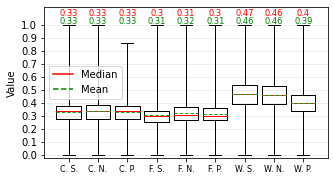

In [21]:
create_boxplot(cc, wc, f3, 'ratio_all_noun_tok', title="", figsize=(4.5,3), ylim=(0, 1.))

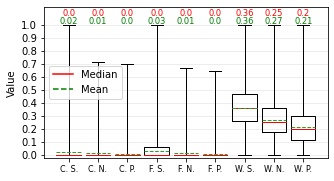

In [25]:
create_boxplot(cc, wc, f3, 'ratio_ne_tok', ylim=(0, 1.), title="", figsize=(4.5,3))

# Total Number of Tokens

In [31]:
wc_sum_tok = [wc[x]['num_tok'].sum() for x in list('snp')]
print(f"wc_sum_tok --> {wc_sum_tok}")
print(f"np.mean(wc_sum_tok) --> {np.mean(wc_sum_tok)}")

f3_sum_tok = [f3[x]['num_tok'].sum() for x in list('snp')]
print(f"f3_sum_tok --> {f3_sum_tok}")
print(f"np.mean(f3_sum_tok) --> {np.mean(f3_sum_tok)}")

cc_sum_tok = [cc[x]['num_tok'].sum() for x in list('snp')]
print(f"cc_sum_tok --> {cc_sum_tok}")
print(f"np.mean(cc_sum_tok) --> {np.mean(cc_sum_tok)}")

wc_sum_tok --> [9632327, 9335604, 9813362]
np.mean(wc_sum_tok) --> 9593764.333333334
f3_sum_tok --> [2144493, 2127903, 2146939]
np.mean(f3_sum_tok) --> 2139778.3333333335
cc_sum_tok --> [6995344, 6970538, 6975663]
np.mean(cc_sum_tok) --> 6980515.0


# Fix bug in NLTK NER Tokens 
 For some captions NLTK detected more NER Tokens than tokens in total.. which is of course not possible (WHY THE HECK IS THIS?!)
-> set this to 1.0

In [23]:
wc['p']['ratio_ne_tok'] = wc['p']['ratio_ne_tok'].where(wc['p']['ratio_ne_tok'] <= 1.0, 1.0)

In [24]:
wc['p']['ratio_ne_tok'].max()

1.0

# Compute Readability Scores for CC & F3 & WC (with spaCy)


## 1st Collect a samples with about 1M characters¶


In [26]:
def collect_samples(cc, wc, f3, num_chars=1000000, err=0.01):
    samples = {'c': None, 'f': None, 'w': None}
    caps = {'c': None, 'f': None, 'w': None}
    
    # copy and make sure they're objects so that they can be concatted
    caps['c'] = cc['s']['caption'].copy().astype("object")
    caps['f'] = f3['s']['caption'].copy().astype("object")
    caps['w'] = wc['s']['caption'].copy().astype("object")
    
    # Add '. ' at the end of the captions (to concat and make it easier for the sent seg)
    def add_punct(s: str):
        res = str(s.strip()) # copy
        # remove trailing dots
        while res[-1] == '.':
            res = res[:-1]
        # add punct
        res += '. '
        
        return res
        
    caps['c'] = caps['c'].apply(add_punct)
    caps['f'] = caps['f'].apply(add_punct)
    caps['w'] = caps['w'].apply(add_punct)
    

#     print(f"caps['c'][:1] --> {caps['c'][:1]}")
#     print(f"caps['f'][:1] --> {caps['f'][:1]}")
#     print(f"caps['w'][:1] --> {caps['w'][:1]}")

    # for coco and f30k sample about 10000k captions
    samples['c'] = caps['c'].sample(n=20000, random_state = 1312).sum()
    samples['f'] = caps['f'].sample(n=20000, random_state = 1312).sum()
    # since captions are about 5 times longer in wicsmmir, take 2000k
    samples['w'] = caps['w'].sample(n=20000 // 5, random_state = 1312).sum()
    

#     print(f"samples['c'][:100] --> {samples['c'][:300]}")
#     print(f"samples['f'][:100] --> {samples['f'][:300]}")
#     print(f"samples['w'][:100] --> {samples['w'][:300]}")
    
    
    # remove captions until len == num_chars +- (num_chars * err)
    def remove_caps(s, num_chars, err):
        char_err = num_chars * err
        while not (num_chars - char_err <= len(s) <= num_chars + char_err):
            # remove the last caption
            s = s[:s.rindex(".", 0, -1) + 1]
        
        return s
    
    samples['c'] = remove_caps(samples['c'], num_chars, err)
    samples['f'] = remove_caps(samples['f'], num_chars, err)
    samples['w'] = remove_caps(samples['w'], num_chars, err)

#     print(f"samples['c'][:100] --> {samples['c'][:300]}")
#     print(f"samples['f'][:100] --> {samples['f'][:300]}")
#     print(f"samples['w'][:100] --> {samples['w'][:300]}")
    
    print(f"len(samples['c']) --> {len(samples['c'])}")
    print(f"len(samples['f']) --> {len(samples['f'])}")
    print(f"len(samples['w']) --> {len(samples['w'])}")
    
    return samples

In [27]:
samples = collect_samples(cc, wc, f3, num_chars=1e6, err=0.001)

len(samples['c']) --> 1000956
len(samples['f']) --> 1000971
len(samples['w']) --> 1000995


## compute readability scores

In [28]:
import spacy
import spacy_readability
from readability import Readability

In [29]:
def compute_readability_scores(samples):
    # spacy setup
    spacy_nlp = spacy.load('en_core_web_lg')
    spacy_nlp.add_pipe(spacy_readability.Readability())
    spacy_nlp.add_pipe(spacy_nlp.create_pipe('sentencizer'))
    spacy_nlp.remove_pipe('tagger')
    spacy_nlp.remove_pipe('parser')
    spacy_nlp.remove_pipe('ner')
    
    spacy_nlp.max_length = 5e6
    
    rs = {'coco': {'s': {'fkg': None, 'fkr': None, 'dc': None},
                'r': {'fkg': None, 'fks': None, 'dc': None}
               },
          
          'f30k' : {'s': {'fkg': None, 'fkr': None, 'dc': None},
                'r': {'fkg': None, 'fks': None, 'dc': None}
                },
          
          'wicsmmir': {'s': {'fkg': None, 'fkr': None, 'dc': None},
                'r': {'fkg': None, 'fks': None, 'dc': None}
               }
         }
    
    
    for x in ['coco', 'f30k', 'wicsmmir']:
        doc = spacy_nlp(samples[x[0]])
        rs[x]['s']['fkg'] = doc._.flesch_kincaid_grade_level
        rs[x]['s']['fkr'] = doc._.flesch_kincaid_reading_ease
        rs[x]['s']['dc'] = doc._.dale_chall
        
        
        r = Readability(samples[x[0]])
        flesch = r.flesch_kincaid()
        rs[x]['r']['fkg'] = flesch.grade_level
        rs[x]['r']['fks'] = flesch.score
        rs[x]['r']['dc'] = r.dale_chall().score
    
    return rs



In [30]:
import json
rs = compute_readability_scores(samples)
print(json.dumps(rs, indent=2))

{
  "coco": {
    "s": {
      "fkg": 4.336864229834028,
      "fkr": 82.57579320394032,
      "dc": 5.758738576306469
    },
    "r": {
      "fkg": "4",
      "fks": 4.29957823680995,
      "dc": 5.709550516899641
    }
  },
  "f30k": {
    "s": {
      "fkg": 5.1287580434972355,
      "fkr": 80.21266560895876,
      "dc": 5.882872163525155
    },
    "r": {
      "fkg": "5",
      "fks": 5.154348914514252,
      "dc": 5.859645010221477
    }
  },
  "wicsmmir": {
    "s": {
      "fkg": 11.06991136135614,
      "fkr": 44.05854428775686,
      "dc": 12.680853651198102
    },
    "r": {
      "fkg": "13",
      "fks": 12.912961620023115,
      "dc": 12.822345986676462
    }
  }
}


[4.336864229834028, 5.1287580434972355, 11.06991136135614]
[4.29957823680995, 5.154348914514252, 12.912961620023115]
[5.758738576306469, 5.882872163525155, 12.680853651198102]
[5.709550516899641, 5.859645010221477, 12.822345986676462]


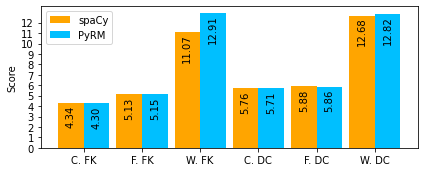

In [32]:
import matplotlib
import matplotlib.pyplot as plt

labels = ['C. FK', 'F. FK', 'W. FK', 'C. DC', 'F. DC', 'W. DC']

s_fkg = [x['s']['fkg'] for x in rs.values()]
print(s_fkg)
r_fkg = [x['r']['fks'] for x in rs.values()]
print(r_fkg)



s_dc = [x['s']['dc'] for x in rs.values()]
print(s_dc)
r_dc = [x['r']['dc'] for x in rs.values()]
print(r_dc)

x = np.arange(len(labels)) * .25  # the label locations
width = 0.11  # the width of the bars

fig, ax = plt.subplots(figsize=(6,2.5))
fig.subplots_adjust(left=0.075, right=0.95, top=0.95, bottom=0.25)
    
rects1 = ax.bar(x - width/2, s_fkg + s_dc, width, label='spaCy', color='orange')
rects2 = ax.bar(x + width/2, r_fkg + r_dc, width, label='PyRM', color='deepskyblue')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, max(s_fkg) + 1))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f" % (height,),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -25 if height < 10 else -30),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color='black', rotation=90)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# save plot
path = Path(os.getcwd()).joinpath(f'reading_scores_w2_barchart.png')
plt.savefig(path,bbox_inches='tight')

plt.show()